# Ecommerce Sales Analysis

In [4]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

### Total Sales by Category


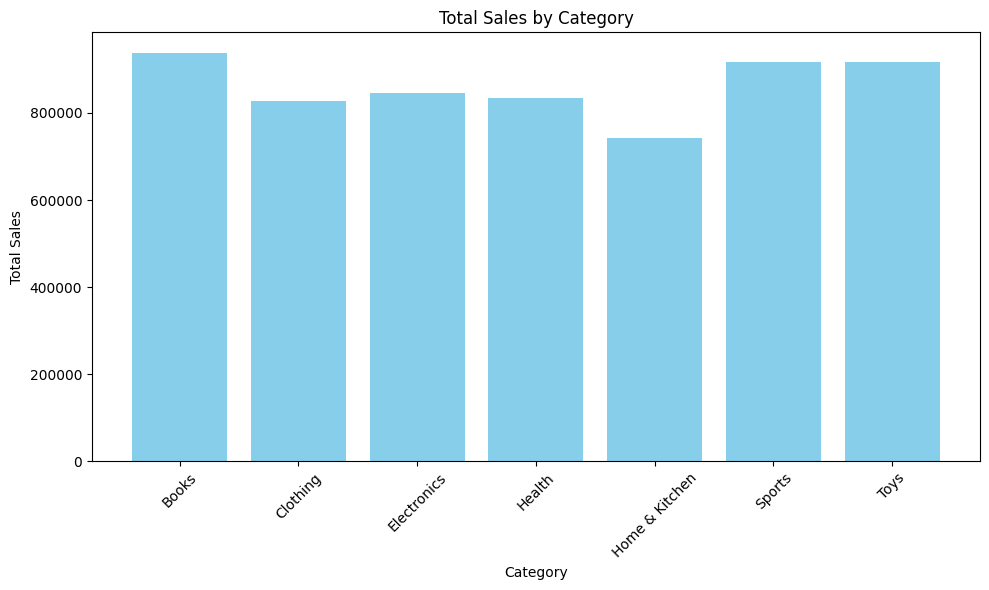

In [5]:
# Load the dataset
sales = pd.read_csv("C:/Users/hasna/OneDrive/Desktop/python/datasheets/ecommerce_sales_analysis.csv")

# Calculate total sales for each entry
sales["total_sales"] = sales.iloc[:, 6:].sum(axis=1)

# Aggregate total sales by category
category_sales = sales.groupby("category")["total_sales"].sum().reset_index()

# Aggregate monthly sales by category
monthly_sales = sales.groupby('category').sum().iloc[:, 5:17].reset_index()

# Calculate minimum and maximum sales across categories
min_sales = category_sales["total_sales"].min()
max_sales = category_sales["total_sales"].max()

# Plot total sales by category
plt.figure(figsize=(10, 6))
bars = plt.bar(category_sales["category"], category_sales["total_sales"], color='skyblue')
plt.xticks(rotation=45)
plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

The bar chart above represents the total sales for each category. The `total_sales` column was calculated by summing the sales across all months for each entry. This visualization helps identify which categories perform best in terms of sales volume.

### Monthly Sales by Category

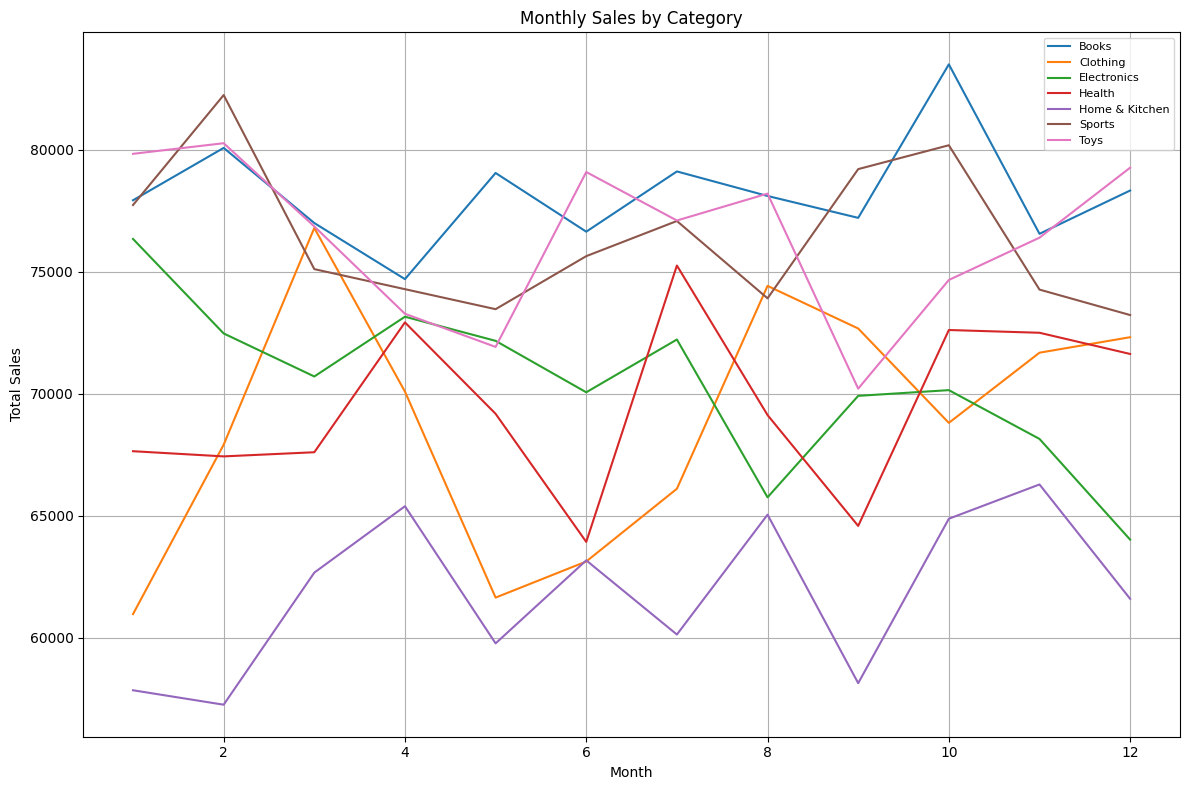

In [6]:
# Plot monthly sales by category
plt.figure(figsize=(12, 8))
for category in monthly_sales['category']:
    plt.plot(range(1, 13), monthly_sales[monthly_sales['category'] == category].iloc[0, 1:], label=category)
plt.legend(loc='upper right', fontsize=8)
plt.title("Monthly Sales by Category")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.tight_layout()
plt.show()



The line chart above shows the sales trend for each category over 12 months. This visualization is useful for spotting seasonal trends or identifying categories with consistent performance across the year.


### Total Monthly Sales with Mean Line

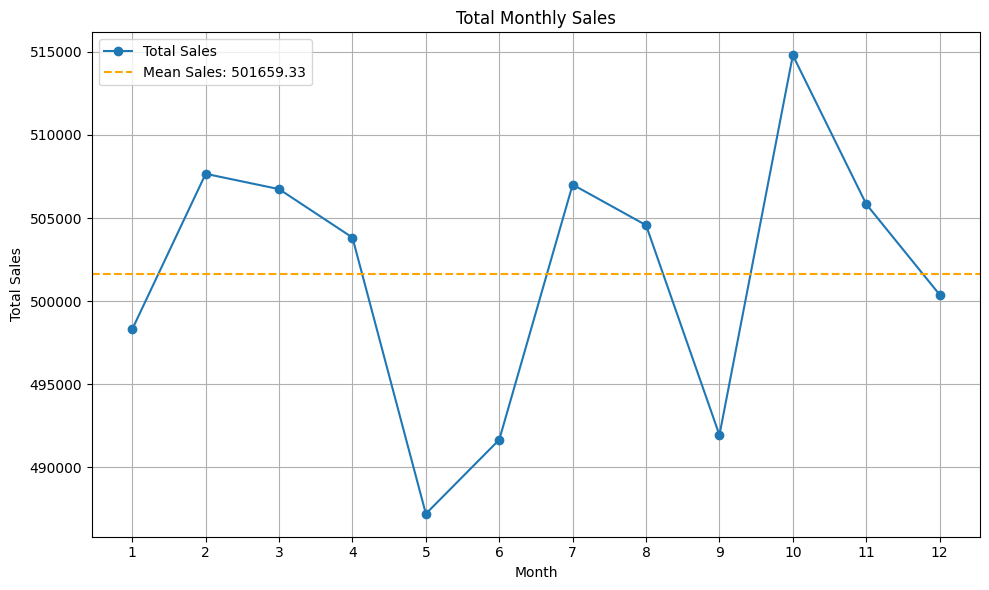

In [7]:
# Calculate total monthly sales across all categories
total_monthly_sales = sales.iloc[:, 6:].sum(axis=0).reset_index()
total_monthly_sales.columns = ["month", "total_sales"]
total_monthly_sales = total_monthly_sales.drop(total_monthly_sales.index[-1])

# Calculate the average monthly sales
mean_sales = total_monthly_sales["total_sales"].mean()

# Plot total monthly sales with the mean sales line
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), total_monthly_sales["total_sales"], marker='o', label="Total Sales")
plt.axhline(mean_sales, color='orange', linestyle='--', label=f"Mean Sales: {mean_sales:.2f}")
plt.title("Total Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()



This plot shows the total sales across all categories for each month. The orange dashed line represents the average monthly sales. This helps to identify which months performed above or below average, providing insights into peak sales periods.


### Average Review Score by Category

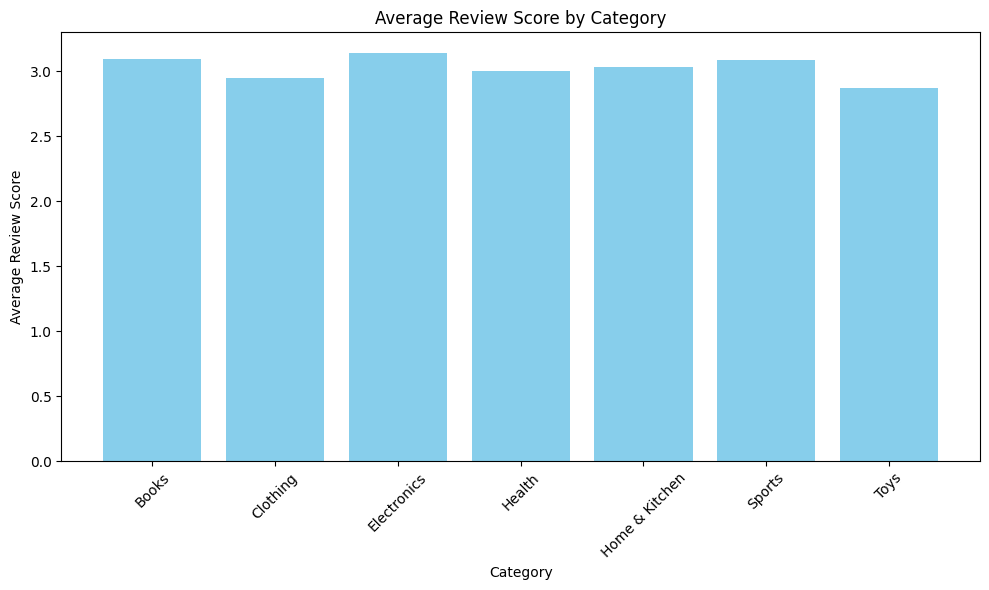

In [8]:
# Calculate average review score by category
reviews = sales.groupby("category")["review_score"].mean().reset_index()

# Plot average review score by category
plt.figure(figsize=(10, 6))
plt.bar(reviews["category"], reviews["review_score"], color='skyblue')
plt.title("Average Review Score by Category")
plt.xlabel("Category")
plt.ylabel("Average Review Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



The final chart represents the average review score for each category. This analysis is crucial for understanding customer satisfaction across different categories, which could be correlated with sales performance.
